In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [688]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [689]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [690]:
species

['E',
 'H2',
 'C3H5',
 'C2H4(V2)',
 'CH4',
 'C2H3^+',
 'H^+',
 'C3H5^+',
 'C3H6',
 'CH2',
 'C5H12',
 'C3H8',
 'H',
 'C2H2^+',
 'C2H6^+',
 'C2H4(V1)',
 'C3H4',
 'C2H',
 'C2H2',
 'C2H6',
 'C2H2(V5)',
 'C3H8^+',
 'C3H7',
 'CH3',
 'CH4^+',
 'H3^+',
 'CH2^+',
 'CH^+',
 'C2H2(V13)',
 'C3H7^+',
 'C2H2(V2)',
 'C2H4^+',
 'C2H6(V24)',
 'C2H6(V13)',
 'C2H4',
 'CH4(V13)',
 'C3H8(V1)',
 'C2H5',
 'C4H9',
 'C3H8(V2)',
 'CH5^+',
 'C3H6(V)',
 'CH4(V24)',
 'C2H5^+',
 'H2^+',
 'CH',
 'C3H4^+',
 'CH3^+',
 'C3H6^+',
 'C2H3']

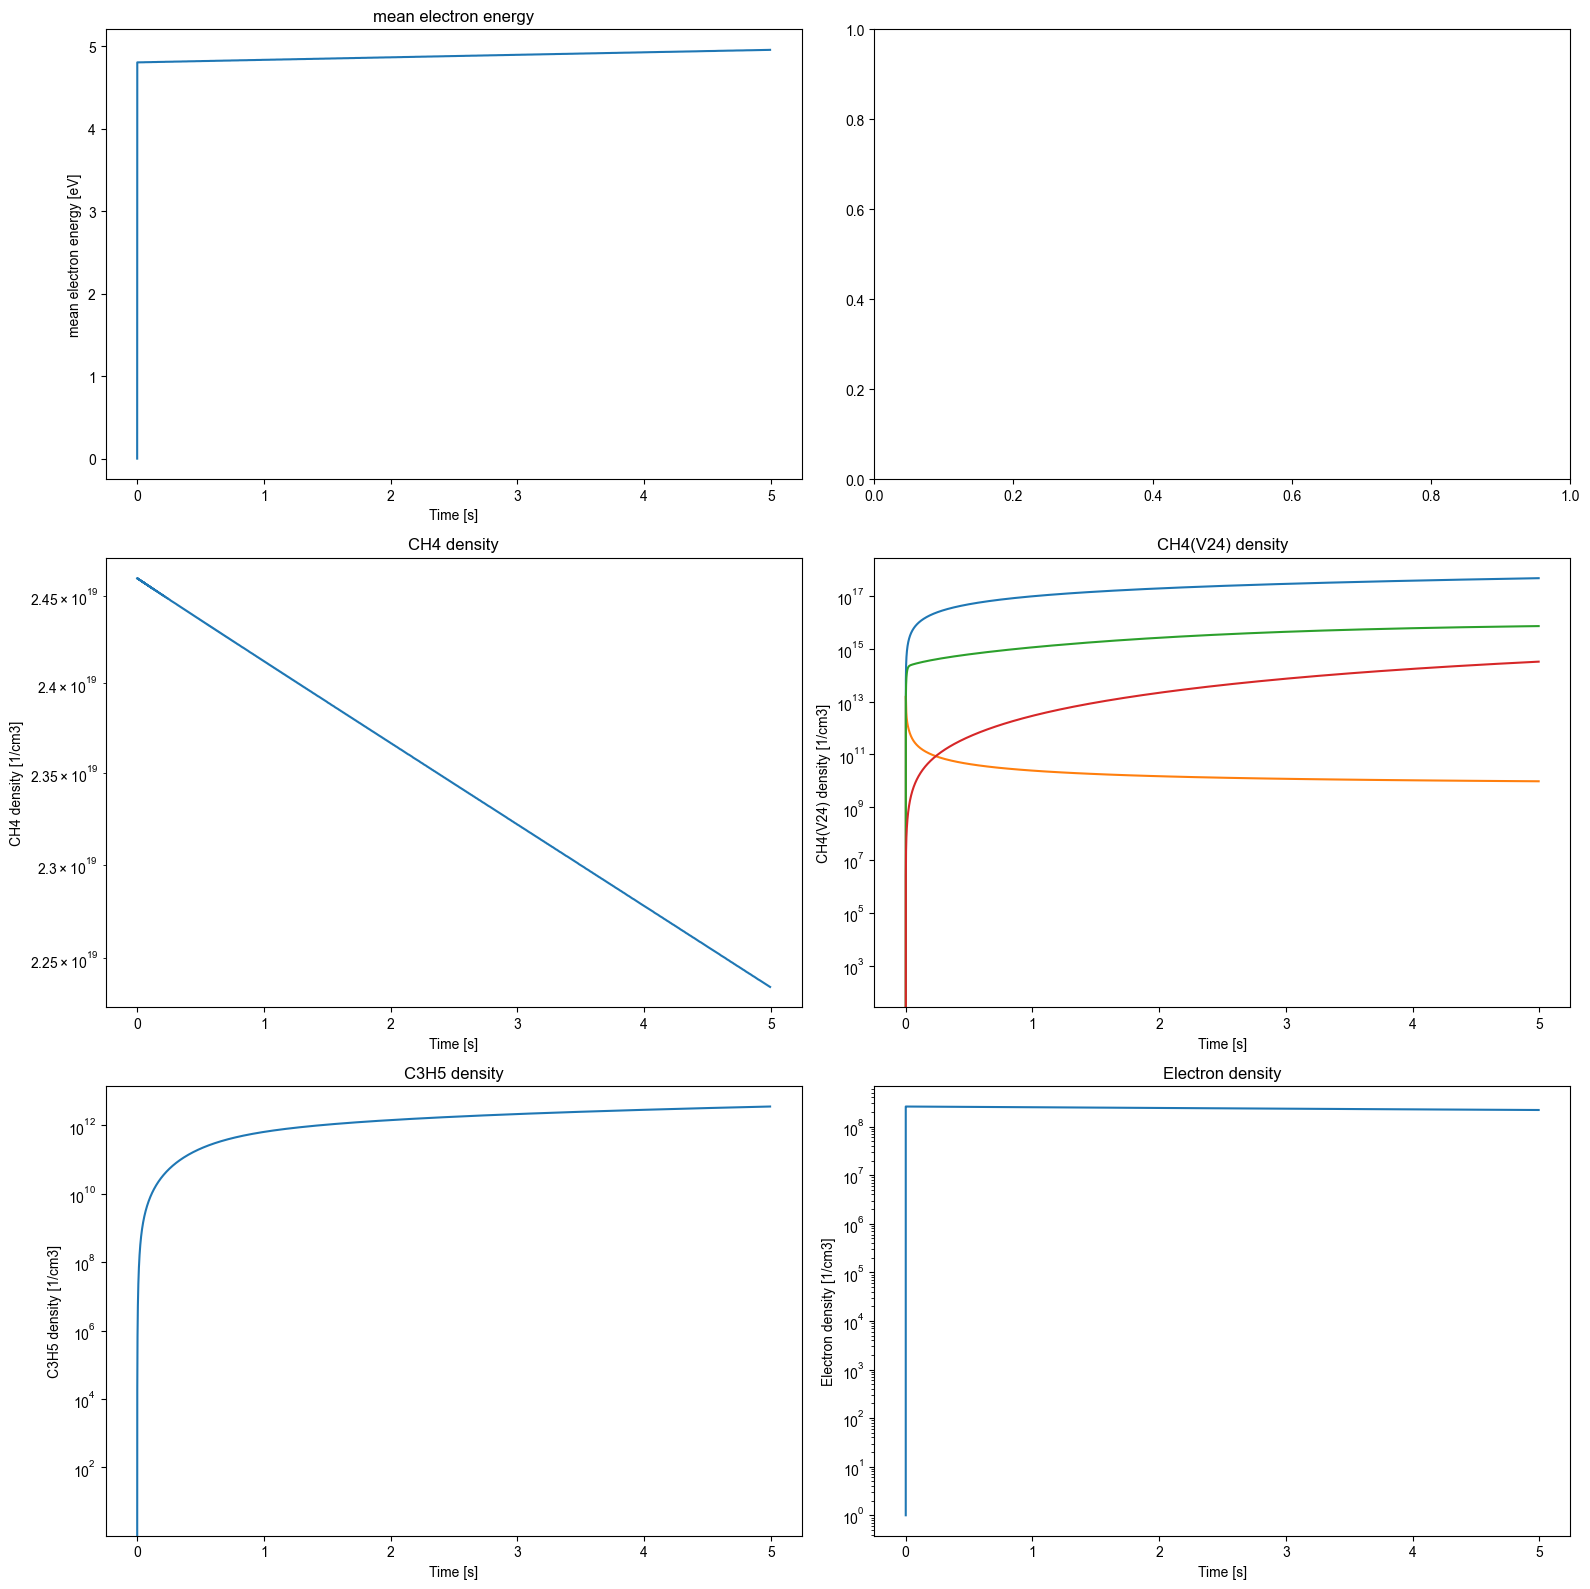

In [691]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')


axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4']+df_sp['CH4(V13)']+df_sp['CH4(V24)'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] )
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H2'] + df_sp['C2H2(V5)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V13)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp[species[2]])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel(species[2]+' density [1/cm3]')
axs[2,0].set_title(species[2]+' density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [692]:
for i in range(len(species)):
    print(f'{species[i]}: {df_sp[species[i]].iloc[-1]}')

E: 219320000.0
H2: 1.1397e+18
C3H5: 3553300000000.0
C2H4(V2): 860210000.0
CH4: 1.9695e+19
C2H3^+: 4005300.0
H^+: 0.0082125
C3H5^+: 20.741
C3H6: 1967700000000.0
CH2: 881090000.0
C5H12: 0.0
C3H8: 299740000000000.0
H: 74531000000000.0
C2H2^+: 133150.0
C2H6^+: 118950.0
C2H4(V1): 2964300000.0
C3H4: 2684300000000.0
C2H: 4.6901e-09
C2H2: 6732800000000000.0
C2H6: 4.2506e+17
C2H2(V5): 243790000000000.0
C3H8^+: 73.558
C3H7: 50146000000.0
CH3: 1.3139e+18
CH4^+: 1702100.0
H3^+: 505.01
CH2^+: 1436500.0
CH^+: 6698.0
C2H2(V13): 53752000000000.0
C3H7^+: 38.01
C2H2(V2): 87355000000000.0
C2H4^+: 5472800.0
C2H6(V24): 1.8341e+16
C2H6(V13): 1.7295e+16
C2H4: 5857800000.0
CH4(V13): 1.2946e+18
C3H8(V1): 12672000000000.0
C2H5: 6128500000000.0
C4H9: 319570000000.0
C3H8(V2): 9702500000000.0
CH5^+: 192250000.0
C3H6(V): 75605000000.0
CH4(V24): 1.3602e+18
C2H5^+: 12835000.0
H2^+: 10725.0
CH: 1100800.0
C3H4^+: 5.4325
CH3^+: 1349900.0
C3H6^+: 5.6731
C2H3: 6768500000000.0
